<a href="https://colab.research.google.com/github/qzlinqian/6_869_project_med_seg/blob/main/helper_function_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Some helper functions

### Mount drive and path define

In [ ]:
import os
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/drive')

data_dir = "/content/drive/MyDrive/data"

datasets_dir = data_dir + '/Task03_Liver'

#os.makedirs(datasets_dir, exist_ok=True)

training_imgs_dir = datasets_dir + '/imagesTr'
training_labels_dir = datasets_dir + '/labelsTr'
test_imgs_dir = datasets_dir + '/imagesTs'
two_d_img_dir = datasets_dir + '/2d_data/images'
two_d_labels_dir = datasets_dir + '/2d_data/labels'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Convert 3D images to 2D

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
index = 0
for i in range(131):
  images = nib.load(training_imgs_dir + '/liver_' + str(i) + '.nii.gz').get_fdata()
  labels = nib.load(training_labels_dir + '/liver_' + str(i) + '.nii.gz').get_fdata()
  for j in range(0, images.shape[2]-3, 3):
    image = images[:,:,j:j+3]
    label = labels[:,:,j:j+3]
    if label.max() == 2:
      image = np.transpose(image, axes=[2,0,1])
      label = np.transpose(label, axes=[2,0,1])
      np.save(two_d_img_dir + '/' + str(index) + '.npy', image)
      np.save(two_d_labels_dir + '/' + str(index) + '.npy', label)
      index += 1

In [ ]:
for filename in os.scandir('/content/drive/MyDrive'):
  if filename.path.endswith('.npy'):
    print(filename.path)
    os.remove(filename.path)

# Make heap images

In [ ]:
images = nib.load(training_imgs_dir + '/liver_0.nii.gz').get_fdata()
labels = nib.load(training_labels_dir + '/liver_0.nii.gz').get_fdata()

In [ ]:
for j in range(images.shape[2]):
  if labels[:,:,j].max() == 2:
    print(j)
    break

46


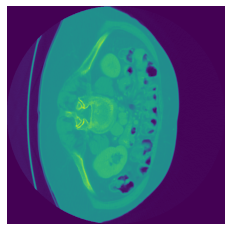

<Figure size 432x288 with 0 Axes>

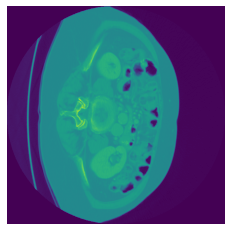

<Figure size 432x288 with 0 Axes>

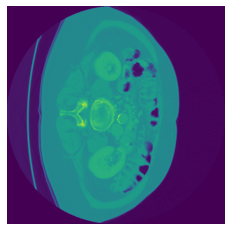

<Figure size 432x288 with 0 Axes>

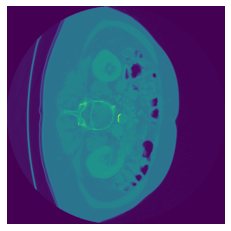

<Figure size 432x288 with 0 Axes>

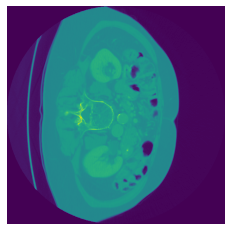

<Figure size 432x288 with 0 Axes>

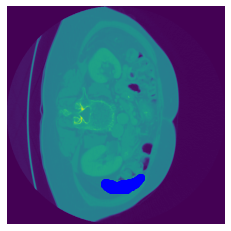

<Figure size 432x288 with 0 Axes>

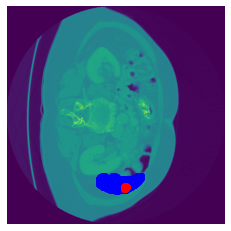

<Figure size 432x288 with 0 Axes>

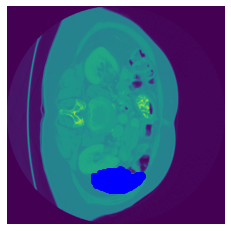

<Figure size 432x288 with 0 Axes>

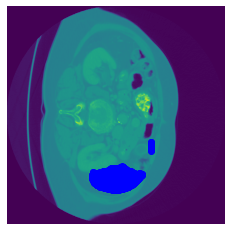

<Figure size 432x288 with 0 Axes>

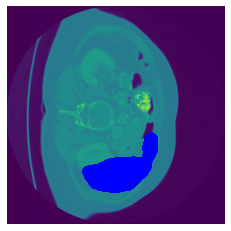

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(40, 50):
  image = images[:,:,i]
  label = labels[:,:,i]
  liver = np.where(label==1)
  tumor = np.where(label==2)
  plt.figure()
  plt.imshow(image)
  plt.plot(liver[1], liver[0], 'ob')
  plt.plot(tumor[1], tumor[0], 'or')
  plt.axis('off')
  plt.show()
  plt.savefig('test_' + str(i) + '.png', bbox_inches='tight')

In [ ]:
# plot "3d" images
image1 = images[:,:,0]
image2 = images[0,:,:]
image3 = images[:,-1,:]

im = Image.fromarray(image1.astype(np.uint8))
im.save('front.png')
im = Image.fromarray(image2.astype(np.uint8))
im.save('top.png')
im = Image.fromarray(image3.astype(np.uint8))
im.save('right.png')

### Display 3D image as gif

In [ ]:
import imageio
import matplotlib.animation as animate
%matplotlib inline
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from cv2 import imread, createCLAHE # read and equalize images
from glob import glob
import h5py
# for display the MRI images in animation
from IPython.display import HTML
def create_gif(input_image, title='.gif', filename='test.gif'):
    # see example from matplotlib documentation
    images = []
    input_image_data = input_image.get_fdata().squeeze()
    fig = plt.figure()
    for i in range(input_image_data.shape[2]):
        im = plt.imshow(input_image_data[:,:,i], animated=True)
        images.append([im])
    ani = animate.ArtistAnimation(fig, images, interval=50, blit=True, repeat_delay=1000)
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.close()
    return ani

img1 = nib.load(training_imgs_dir + "/liver_0.nii.gz")
ani = create_gif(img1, title='test', filename='test.gif')
HTML(ani.to_html5_video())

In [ ]:
img2 = nib.load(training_labels_dir + "/liver_0.nii.gz")
ani = create_gif(img2, title='test', filename='test.gif')
HTML(ani.to_html5_video())

In [ ]:
img_arr = img2.get_fdata()
img_arr = np.squeeze(img_arr)
plt.imshow(img_arr[:,:,60])